# Supervised Learning: Classification and Regression in H2O-3

## Test and visualize the performance of a variety of supervised learning algorithms in H2O-3

### Initialize an H2O cluster

In [1]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import h2o 
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 19.0.2+7-44, mixed mode, sharing)
  Starting server from C:\Users\PHU\AppData\Local\Programs\Python\Python39\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\PHU\AppData\Local\Temp\tmpqaobeiaj
  JVM stdout: C:\Users\PHU\AppData\Local\Temp\tmpqaobeiaj\h2o_PHU_started_from_python.out
  JVM stderr: C:\Users\PHU\AppData\Local\Temp\tmpqaobeiaj\h2o_PHU_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Asia/Ho_Chi_Minh
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_PHU_alkg9q
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.943 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


### Import the data

In [2]:
name = "airlines_all.05p.csv"
airlines = h2o.upload_file(name)

Parse progress: |██████████████████████████████████████████████████████████████████| (done) 100%


First look at the data

In [3]:
airlines.head()

Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsArrDelayed,IsDepDelayed
1988,1,9,6,1348,1331,1458,1435,PI,942,nan,70,64,nan,23,17,SYR,BWI,273,nan,nan,0,nan,0,nan,nan,nan,nan,nan,YES,YES
1988,1,29,5,1339,1331,1442,1435,PI,942,nan,63,64,nan,7,8,SYR,BWI,273,nan,nan,0,nan,0,nan,nan,nan,nan,nan,YES,YES
1988,1,23,6,950,950,1041,1050,PI,943,nan,51,60,nan,-9,0,LGA,SYR,198,nan,nan,0,nan,0,nan,nan,nan,nan,nan,NO,NO
1988,1,18,1,1124,1110,1213,1145,PI,943,nan,49,35,nan,28,14,SYR,BUF,134,nan,nan,0,nan,0,nan,nan,nan,nan,nan,YES,YES
1988,1,10,7,1503,1500,1602,1550,PI,944,nan,59,50,nan,12,3,JFK,UCA,191,nan,nan,0,nan,0,nan,nan,nan,nan,nan,YES,YES
1988,1,30,6,1500,1500,1558,1550,PI,944,nan,58,50,nan,8,0,JFK,UCA,191,nan,nan,0,nan,0,nan,nan,nan,nan,nan,YES,NO
1988,1,20,3,1750,1705,1900,1810,PI,944,nan,70,65,nan,50,45,SYR,BOS,264,nan,nan,0,nan,0,nan,nan,nan,nan,nan,YES,YES
1988,1,10,7,1616,1610,1632,1630,PI,944,nan,16,20,nan,2,6,UCA,SYR,37,nan,nan,0,nan,0,nan,nan,nan,nan,nan,YES,YES
1988,1,30,6,1610,1610,1627,1630,PI,944,nan,17,20,nan,-3,0,UCA,SYR,37,nan,nan,0,nan,0,nan,nan,nan,nan,nan,NO,NO
1988,1,22,5,2026,2031,2135,2142,PI,945,nan,69,71,nan,-7,-5,SYR,DCA,298,nan,nan,0,nan,0,nan,nan,nan,nan,nan,NO,NO


In [4]:
airlines.describe

<bound method H2OFrame.describe of H2OFrame({'_ex': <Expr()#Key_Frame__upload_a7b6474f97a685c36214b5d8922549b1.hex>})>

### Visualising data

The dataset has around five million rows and thirty-one columns. Let’s now quickly plot a histogram of the Year column to see if there is a pattern in the data.

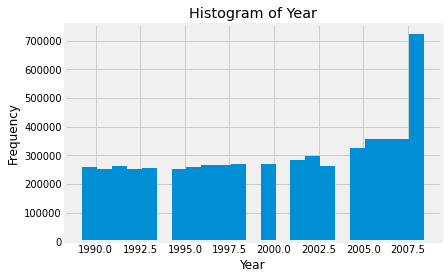

breaks,counts,mids_true,mids,widths
1988.83,nan,nan,nan,nan
1989.67,260105,994,1989.25,0.833333
1990.5,252060,994.5,1990.08,0.833333
1991.33,263545,995,1990.92,0.833333
1992.17,253846,995.5,1991.75,0.833333
1993,254608,996,1992.58,0.833333
1993.83,0,0,1993.42,0.833333
1994.67,253525,996.5,1994.25,0.833333
1995.5,259002,997,1995.08,0.833333
1996.33,266372,997.5,1995.92,0.833333


In [5]:
%matplotlib inline
airlines["Year"].hist()

Interestingly, the histogram shows that we do not have data for some years. This is the power that EDA brings to analysis. It helps to quickly pinpoint anomalies in datasets like missing values, outliers, etc.

Next, let’s plot the Departure versus the Arrival time to see if there is a relation between the two. This time we’ll plot a scatterplot so that we can see individual points.

Text(0, 0.5, 'Arrival Time')

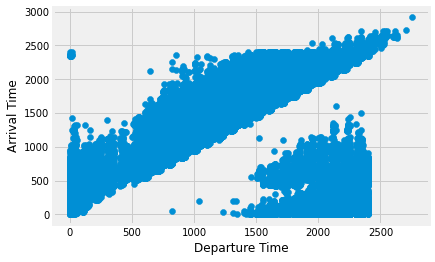

In [6]:
# Convert H2O Frame into Pandas dataframe for plotting with matplotlib
airlines_pd = airlines.as_data_frame(use_pandas = True)
plt.scatter(airlines_pd.DepTime, airlines_pd.ArrTime)
plt.xlabel("Departure Time")
plt.ylabel("Arrival Time")

As stated above, we do get a scatterplot, but the individual points are hardly discernable. A lot of overlapping points make it difficult to see a general trend in the data.

### H2O-3’s Aggregator method to fix overlapping points

**Reduce the Size of the Data using H2O-3’s Aggregator**\
Merely looking at the entire data doesn’t make much sense. We could instead investigate a portion of the data provided it reflects the properties of the complete dataset. This is where H2O-3’s Aggregator method comes into the picture. The H2O Aggregator method is a clustering-based method for reducing a numerical/categorical dataset into a dataset with fewer rows.\
Let’s now reduce the size of the data to 1000 data points. We will first create an aggregated frame with around 1000 records and then create a new data frame using this aggregated frame.

In [7]:
from h2o.estimators.aggregator import H2OAggregatorEstimator

# Build an aggregated frame with around 1000 records
agg_frame = H2OAggregatorEstimator(target_num_exemplars = 1000)
agg_frame.train(training_frame=airlines)

# Use the aggregated model to create a new dataframe using aggregated_frame
small_airlines_data = agg_frame.aggregated_frame

aggregator Model Build progress: |

c:\Users\PHU\AppData\Local\Programs\Python\Python39\lib\site-packages\h2o\estimators\estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [CancellationCode]
  warnings.warn(mesg["message"], RuntimeWarning)


███████████████████████████████████████████████| (done) 100%


Indeed, we have about 1000 data points now, but we have an extra column too. If you notice, the columns count increased by one. Let’s look at all the columns of the new data frame.

In [8]:
small_airlines_data.head()

Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsArrDelayed,IsDepDelayed,counts
1988,1,9,6,1348,1331,1458,1435,PI,942,nan,70,64,nan,23,17,SYR,BWI,273,nan,nan,0,nan,0,nan,nan,nan,nan,nan,YES,YES,160254
1988,1,23,6,950,950,1041,1050,PI,943,nan,51,60,nan,-9,0,LGA,SYR,198,nan,nan,0,nan,0,nan,nan,nan,nan,nan,NO,NO,175286
1988,1,18,1,1124,1110,1213,1145,PI,943,nan,49,35,nan,28,14,SYR,BUF,134,nan,nan,0,nan,0,nan,nan,nan,nan,nan,YES,YES,46915
1988,1,30,6,1500,1500,1558,1550,PI,944,nan,58,50,nan,8,0,JFK,UCA,191,nan,nan,0,nan,0,nan,nan,nan,nan,nan,YES,NO,27691
1988,1,22,5,2026,2031,2135,2142,PI,945,nan,69,71,nan,-7,-5,SYR,DCA,298,nan,nan,0,nan,0,nan,nan,nan,nan,nan,NO,NO,50607
1988,1,15,5,1917,1910,2015,2016,PI,948,nan,58,66,nan,-1,7,CHO,LGA,305,nan,nan,0,nan,0,nan,nan,nan,nan,nan,NO,YES,95209
1988,1,25,1,1409,1410,1600,1530,PI,948,nan,111,80,nan,30,-1,EWR,ROA,389,nan,nan,0,nan,0,nan,nan,nan,nan,nan,YES,NO,125362
1988,1,18,1,nan,1826,nan,1851,PI,948,nan,nan,25,nan,nan,nan,LYH,CHO,70,nan,nan,1,nan,0,nan,nan,nan,nan,nan,YES,YES,46623
1988,1,13,3,2106,2052,2156,2152,PI,950,nan,50,60,nan,4,14,BWI,BGM,212,nan,nan,0,nan,0,nan,nan,nan,nan,nan,YES,YES,156128
1988,1,6,3,1710,1710,1832,1825,PI,953,nan,82,75,nan,7,0,JFK,BUF,301,nan,nan,0,nan,0,nan,nan,nan,nan,nan,YES,NO,39551


### Visualizing the reduced data frame

Let’s now visualize the new data frame. We’ll create the same scatterplot as we did above as a way to compare the two.

Text(0, 0.5, 'ArrTime')

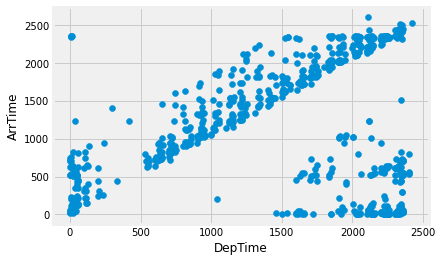

In [9]:
small_airlines_pd = small_airlines_data.as_data_frame(use_pandas = True)
plt.scatter(small_airlines_pd.DepTime, small_airlines_pd.ArrTime)
plt.xlabel("DepTime")
plt.ylabel("ArrTime")

As expected, this step takes much less time and outputs distinct data points readily discernible by the human eye.

### Shutting down the cluster

In [10]:
h2o.cluster().shutdown()

H2O session _sid_a2ac closed.


# Build Models with H2O

Now, I will use the built-in H2O algorithms to build models and compare their performance. I will use the following algorithms:

  * Generalized Linear Model (GLM)
  * Gradient Boosting Machine (GBM)
  * Deep Learning (DL)
  * Deep learning with Neural Network 
  * RuleFit
  * AutoML

This part will use another big dataset, which is Black Friday dataset. The following models will predict the **Purchase** amount of customer against various **product's categories**, or the customer's **Age**, **Occupation**, **City_Category**, **Stay_In_Current_City_Years**, **Marital_Status**.

## Generalized Linear Models

**Why I chose GLM?**\
GLM is a generalized linear model, implemented in H2O, which can be used for regression or classification problems. It is a flexible generalization of ordinary linear regression that allows for response variables that have error distribution models other than a normal distribution.

### Import the libraries and start the H2O cluster

In [36]:
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
import numpy as np
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 13 mins
H2O_cluster_timezone:,Asia/Ho_Chi_Minh
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_PHU_lqdkjf
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.360 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [14]:
# Import the dataset 
test = "./Black friday dataset/test.csv"
train = "./Black friday dataset/train.csv"
test_df = h2o.upload_file(test)
train_df = h2o.upload_file(train)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


### Split the data into train and validation sets

In [15]:
train, validation = train_df.split_frame(ratios=[.8], seed=1234)

In [17]:
# Identify predictors and response
print(f"Column names:  {train_df.col_names}")
predictors= ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']
response_col = 'Purchase'

Column names:  ['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']


### Build a GLM model

In [18]:
# Generate a GLM model using the training dataset
glm_model = H2OGeneralizedLinearEstimator(family = "gaussian", model_id = "glm_model", seed = 1234)
glm_model.train(x = predictors, y = response_col, training_frame = train, validation_frame = validation)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: glm_model


GLM Model: summary
    family    link      regularization                               number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  -------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 3.4422 )  18                            17                             1                       py_10_sid_8955

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 23205568.05680803
RMSE: 4817.215799277424
MAE: 3849.4365246412817
RMSLE: 0.7343726988378391
Mean Residual Deviance: 23205568.05680803
R^2: 0.07920420065066414
Null degrees of freedom: 440350
Residual degrees of freedom: 440333
Null deviance: 11097569196779.855
Residual deviance: 10218595099383.473
AIC: 8718010.166484071

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 23321662.078232896
RMSE: 4829.250674611217
MAE: 3863.766048248653
RMSLE: 0.7379020766494685
Mean Residual Deviance: 23321662.078232896
R^2: 0.07999514384674544
Null degrees of freedom: 109716
Residual degrees of freedom: 109699
Null deviance: 2781274212318.671
Residual deviance: 2558782798237.4785
AIC: 2172738.5441740006

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective          training_rmse      training_deviance    training_mae        training_r2          validation_rmse    validation_deviance    validation_mae     validation_r2
--  -------------------  ----------  ------------  -------------------------  -----------------  -----------------  -------------------  ------------------  -------------------  -----------------  ---------------------  -----------------  -------------------
    2023-03-21 11:06:46  0.000 sec   0             11097569196779.855         25201644.13565509
    2023-03-21 11:06:46  0.404 sec   1                                                           4817.215799277424  23205568.05680803    3849.4365246412817  0.07920420065066414  4829.250674611217  23321662.078232896     3863.766048248653  0.07999514384674544

Variable Importances: 
variable                    relative_importance    scaled_importance    percentage
--------------------------  ---------------------  -------------------  ------------
Product_Category_1          604.696                1                    0.516414
Product_Category_2          232.835                0.385045             0.198842
City_Category.C             66.8927                0.110622             0.0571267
Gender.F                    53.6387                0.0887036            0.0458078
Gender.M                    53.6387                0.0887036            0.0458078
City_Category.A             43.7118                0.0722871            0.0373301
Occupation                  32.5519                0.0538319            0.0277996
City_Category.B             22.1809                0.0366811            0.0189427
Age.18-25                   12.2523                0.0202618            0.0104635
Age.51-55                   11.8639                0.0196196            0.0101318
Product_Category_3          11.2175                0.0185507            0.00957983
Age.36-45                   6.6539                 0.0110037            0.00568247
Stay_In_Current_City_Years  6.57539                0.0108739            0.00561542
Age.0-17                    5.04489                0.00834284           0.00430836
Age.26-35                   3.30628                0.00546767           0.00282358
Age.55+                     2.34441                0.003877             0.00200214
Marital_Status              1.54758                0.00255927           0.00132164
Age.46-50                   0                      0                    0

[tips]
Use `model.expla

### Predict on the test set

In [23]:
glm_predict = glm_model.predict(test_df)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [24]:
glm_predict.head()

predict
9892.85
9979.38
9006.67
9389.26
9643.42
10177.5
9964.98
10115.4
8392.54
9140.22


### Evaluate the model

In [43]:
# find the model performance with accuracy 
glm_performance = glm_model.model_performance(test_data=test_df)
glm_performance

## Gradient Boosting Machines (GBMs)

**Why I chose GBM?**\
Gradient Boosting Machines (GBMs) are a powerful and popular machine learning algorithm. They are a type of ensemble method, which combines the predictions from multiple models to create a more accurate final prediction. GBMs are a type of boosting algorithm, which builds an ensemble of models sequentially. Each new model attempts to correct the errors of the previous models.

### Build a GBM model

In [22]:
#generate GBM model 
from h2o.estimators.gbm import H2OGradientBoostingEstimator
gbm_model = H2OGradientBoostingEstimator(model_id = "gbm_model", seed = 1234)
gbm_model.train(x = predictors, y = response_col, training_frame = train, validation_frame = validation)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,50.0,50.0,22861.0,5.0,5.0,5.0,29.0,32.0,31.84
,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2023-03-21 11:33:06,0.052 sec,0.0,5020.1239164,4066.6085068,25201644.1356551,5034.8315209,4082.2996568,25349528.4442582
,2023-03-21 11:33:07,0.796 sec,1.0,4735.0774868,3801.3252819,22420958.8062679,4750.0093100,3816.0798646,22562588.4449465
,2023-03-21 11:33:07,1.122 sec,2.0,4490.8967557,3571.0716210,20168153.6707137,4505.9871410,3584.9315484,20303920.1152356
,2023-03-21 11:33:08,1.415 sec,3.0,4282.9666143,3382.6486421,18343803.0194165,4298.1711983,3395.6240251,18474275.6501334
,2023-03-21 11:33:08,1.563 sec,4.0,4106.4302464,3218.4954281,16862769.3683714,4121.7116050,3230.8068728,16988506.5545139
,2023-03-21 11:33:08,1.718 sec,5.0,3956.1323769,3075.1757136,15650983.3833639,3971.1853697,3086.4646873,15770313.2406981
,2023-03-21 11:33:08,1.846 sec,6.0,3830.1388449,2949.6299016,14669963.5715805,3845.3430781,2960.3877113,14786663.3881894
,2023-03-21 11:33:08,1.958 sec,7.0,3735.0803563,2852.4569928,13950825.2681446,3750.0996969,2862.6004020,14063247.7368230


### Predict on the test set

In [26]:
#predict using GBM model
gbm_predict = gbm_model.predict(test_df)
gbm_predict.head()

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict
13243.4
10452.9
6129.75
2708.07
2834.88
11730
13546.4
11351.8
17538.4
6171.97


### Evaluate the model

In [39]:
print(np.round(gbm_model.model_performance(train).auc(),2),
     np.round(gbm_model.model_performance(validation).auc(),2),
     np.round(gbm_model.model_performance(test).auc(),2))

KeyError: 'AUC'

## Advanced models Neural Networks (NN)

**Why I chose NN?**\
Neural networks are a type of machine learning algorithm that is loosely inspired by the way the human brain operates. They are designed to recognize patterns in data by using a process that mimics the way the human brain operates. Neural networks are a type of artificial intelligence (AI) that can learn from data that you provide. They can be used for both classification and regression predictive modeling problems.

### Build a Neural Network model

In [27]:
#generate Neural Network model
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
dl_model = H2ODeepLearningEstimator(model_id = "dl_model", seed = 1234)
dl_model.train(x = predictors, y = response_col, training_frame = train, validation_frame = validation)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: dl_model


Status of Neuron Layers: predicting Purchase, regression, gaussian distribution, Quadratic loss, 44,801 weights/biases, 534.8 KB, 4,500,561 training samples, mini-batch size 1
    layer    units    type       dropout    l1    l2    mean_rate             rate_rms              momentum    mean_weight           weight_rms           mean_bias             bias_rms
--  -------  -------  ---------  ---------  ----  ----  --------------------  --------------------  ----------  --------------------  -------------------  --------------------  -----------------------
    1        21       Input      0.0
    2        200      Rectifier  0.0        0.0   0.0   0.14924690646362554   0.3616420030593872    0.0         -0.08430682888478432  0.25875771045684814  -0.36365797755025214  0.68947434425354
    3        200      Rectifier  0.0        0.0   0.0   0.33671600206780206   0.2466556429862976    0.0         -0.06601198504239232  0.21428334712982178  0.00818484942692751   1.0104084014892578
    4        1        Linear                0.0   0.0   0.012687835669566994  0.009127598255872726  0.0         0.018055927907817022  0.09767544269561768  -1.7005766207840243   1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 8593669.415146302
RMSE: 2931.4961052585936
MAE: 2177.4432458032315
RMSLE: NaN
Mean Residual Deviance: 8593669.415146302

ModelMetricsRegression: deeplearning
** Reported on validation data. **

MSE: 8937899.62732799
RMSE: 2989.6320220602383
MAE: 2210.863753721727
RMSLE: NaN
Mean Residual Deviance: 8937899.62732799

Scoring History: 
    timestamp            duration          training_speed    epochs    iterations    samples      training_rmse    training_deviance    training_mae    training_r2    validation_rmse    validation_deviance    validation_mae    validation_r2
--  -------------------  ----------------  ----------------  --------  ------------  -----------  ---------------  -------------------  --------------  -------------  -----------------  ---------------------  ----------------  ---------------
    2023-03-21 11:36:59  0.000 sec                           0         0             0            nan              nan                  nan             nan            nan                nan                    nan               nan
    2023-03-21 11:37:04  5.700 sec         24348 obs/sec     0.226976  1             99949        3710.73          1.37695e+07          2620.22         0.449678       3766.78            1.41887e+07            2664.67           0.440278
    2023-03-21 11:37:17  18.846 sec        62718 obs/sec     2.27201   10            1.00048e+06  2977.51          8.86554e+06          2229.71         0.645674       3026.53            9.15987e+06            2254.26           0.638657
    2023-03-21 11:37:30  31.796 sec        75874 obs/sec     4.77042   21            2.10066e+06  2957.25          8.7453e+06           2269.09         0.65048        3014.48            9.08709e+06            2302.83           0.641528
    2023-03-21 11:37:42  44.070 sec        80164 obs/sec     7.04249   31            3.10117e+06  2942.69          8.65945e+06          2199.53         0.653911       2995.38            8.97227e+06            2223.98           0.646057
    2023-03-21 11:37:56  57.885 sec        82093 obs/sec     9.53798   42            4.20006e+06  2943.59          8.66472e+06          2241.24         0.6537         2997.73            8.98638e+06            2272.86           0.645501
    2023-03-21 11:38:01  1 min  2.950 sec  82001 obs/sec     10.2204   45            4.50056e+06  2931.5           8.59367e+06          2177.44         0.65654        2989.63            8.9379e+06             2210.86           0.647413

Variable Importances: 
variable                    relative_importance    scaled_importance    percentage
--------------------------  ---------------------  ------------------- 

### Predict on the test set

In [28]:
#predict using Neural Network model
dl_predict = dl_model.predict(test_df)
dl_predict.head()

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


predict
15347.8
10442.9
6330.85
3322.33
3024.09
10829.3
13156.6
12054.5
19253.5
6277.88


### Evaluate the model

## Miscellaneous models RuleFit

**Why I chose RuleFit?**\
RuleFit is a supervised learning algorithm that combines the interpretability of decision rules with the accuracy of ensembles of trees. 


### Build a RuleFit model

In [31]:
#generate RuleFit model
from h2o.estimators.rulefit import H2ORuleFitEstimator
rulefit_model = H2ORuleFitEstimator(model_id = "rulefit_model", seed = 1234)
rulefit_model.train(x = predictors, y = response_col, training_frame = train, validation_frame = validation)

rulefit Model Build progress: |██████████████████████████████████████████████████| (done) 100%


,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,rule_ensemble_size,number_of_trees,number_of_internal_trees,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,gaussian,identity,Lasso (lambda = 1.7211 ),353,115,2,335.0,50.0,50.0,0.0,3.0,3.0,0.0,8.0,6.7


### Predict on the test set

In [32]:
#predict using RuleFit model
rulefit_predict = rulefit_model.predict(test_df)
rulefit_predict.head()

rulefit prediction progress: |███████████████████████████████████████████████████| (done) 100%


predict
13168.1
9871.97
6111.73
5945.58
2496.6
11964.9
13772.3
10811.8
7546.68
5916.54


### Evaluate the model

## AutoML

**Why I chose AutoML?**\
H2O-3 AutoML is an automated machine learning (AutoML) capability that enables users to automatically build and compare a variety of models on a dataset, without any manual model tuning. AutoML is a great way to get started with machine learning, and can also be used to quickly compare the performance of different algorithms on a dataset.

### Build an AutoML model

H2O-3 AutoML can be used to build a variety of models, including GBMs, GLMs, and deep learning models. AutoML can also be used to build stacked ensembles of the models it builds. In this example, we will build 10 models to compare their performance.

In [33]:
#generate AutoML model
from h2o.automl import H2OAutoML
aml = H2OAutoML(max_models = 10, seed = 1)
aml.train(x = predictors, y = response_col, training_frame = train, validation_frame = validation)

AutoML progress: |
11:51:27.915: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
11:51:27.925: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/10
# GBM base models (used / total),3/6
# DeepLearning base models (used / total),0/1
# DRF base models (used / total),1/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


### Predict on the test set

In [34]:
#predict using AutoML model
aml_predict = aml.predict(test_df)
aml_predict.head()

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict
14635.9
10627.9
6526.35
2531.58
2550.15
11292.3
13089
10909.2
18122.7
6005.26


### Evaluate the model

H2O-3 AutoML has built a total of 10 models. Let’s look at the leaderboard to see the performance of each model.

In [41]:
leaderboard = aml.leaderboard
leaderboard.head(rows=leaderboard.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20230321_115127,2867.89,8.22482e+06,2141.37,nan,8.22482e+06
StackedEnsemble_BestOfFamily_1_AutoML_1_20230321_115127,2870.06,8.23726e+06,2140.52,nan,8.23726e+06
GBM_1_AutoML_1_20230321_115127,2870.71,8.24095e+06,2140.85,nan,8.24095e+06
GBM_4_AutoML_1_20230321_115127,2877.08,8.27761e+06,2152.4,nan,8.27761e+06
GBM_3_AutoML_1_20230321_115127,2885.44,8.32577e+06,2162.06,nan,8.32577e+06
GBM_2_AutoML_1_20230321_115127,2903.32,8.42926e+06,2180.61,nan,8.42926e+06
GBM_5_AutoML_1_20230321_115127,2915.81,8.50197e+06,2192.54,nan,8.50197e+06
GBM_grid_1_AutoML_1_20230321_115127_model_1,2929.58,8.58247e+06,2209.29,nan,8.58247e+06
DeepLearning_1_AutoML_1_20230321_115127,3054.45,9.32968e+06,2315.05,nan,9.32968e+06
DRF_1_AutoML_1_20230321_115127,3283.24,1.07797e+07,2461.05,0.551358,1.07797e+07
